# **COD Model Development**

## Objectives

* Use supervised ML models to predict COD levles based on operational and environmental data.
* Enable proactive decisions for dosing and chemical treament using a predicitive model.
* Using both regression and classification approaches.

## Inputs

* outputs/datasets/collection/cleaned_cod_data.csv

## Outputs

* Trained and validated regression model.

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD'

# Load Data and Preprocess

In [4]:
import pandas as pd
df = pd.read_csv(f"outputs/datasets/collection/cleaned_cod_data.csv", parse_dates=['date'])
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,date,Month,Month_Name,Season
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014-01-01,1,Jan,Winter
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014-01-02,1,Jan,Winter
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014-01-05,1,Jan,Winter
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014-01-06,1,Jan,Winter
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014-01-07,1,Jan,Winter


In [5]:
# Define target variable
target = 'Chemical Oxygen Demand'

# Define features (drop irrelevant columns and target)
# Adjust this list based on what you kept during EDA
features = df.drop(columns=[target, 'date', 'Month_Name', 'Month', 'Season', 'Average Outflow', 'Average Inflow', 'Energy Consumption', 'Average Temperature', 'Maximum temperature', 'Minimum temperature', 'Atmospheric pressure', 'Average humidity', 'Total rainfall', 'Average visibility', 'Average wind speed', 'Maximum wind speed'])  # keep only numerical features

X = features
y = df[target]


In [6]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate and train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 50.30
RMSE: 73.55
R²: 0.71


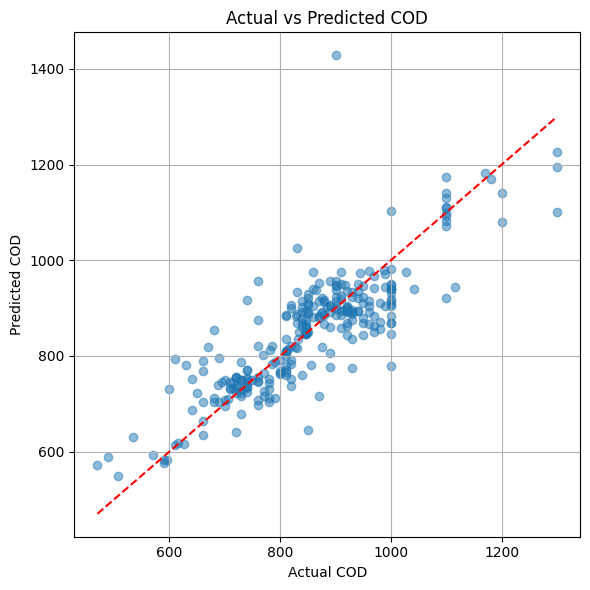

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual COD')
plt.ylabel('Predicted COD')
plt.title('Actual vs Predicted COD')
plt.grid(True)
plt.tight_layout()
plt.show()


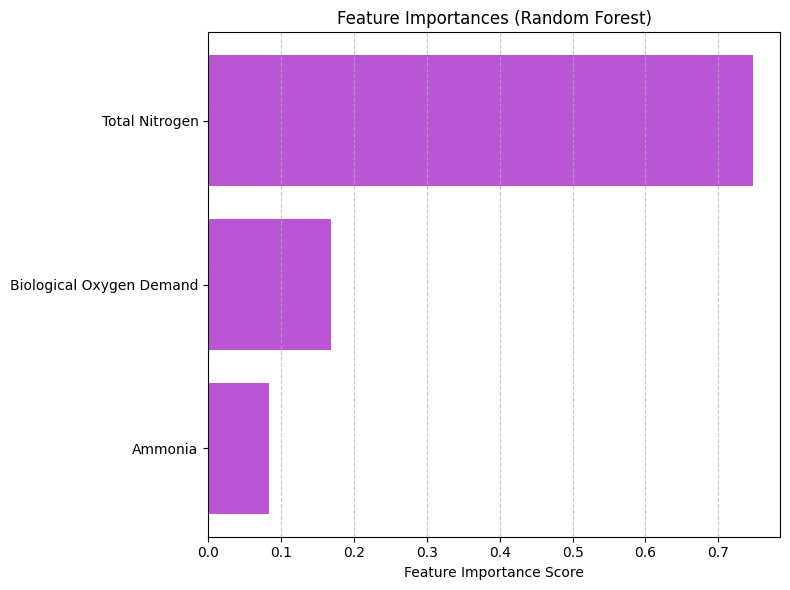

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for sorting and plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='mediumorchid')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Total Nitrogen is the most important feature for predicitign TOC, followed by BOD and then Ammonia is the least influential, though still seen as a relative indicator.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [11]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [12]:
# Create model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best R² score (cross-val):", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estim

In [13]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate again
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned MAE: {mae_best:.2f}")
print(f"Tuned RMSE: {rmse_best:.2f}")
print(f"Tuned R²: {r2_best:.2f}")


Tuned MAE: 49.44
Tuned RMSE: 73.60
Tuned R²: 0.71


---

# COD Classification Model

Section 2 content

In [14]:
# Copy the original dataframe
df_class = df.copy()

# Create COD risk level labels
def cod_risk_level(cod):
    if cod < 600:
        return 'Low'
    elif cod <= 900:
        return 'Medium'
    else:
        return 'High'

df_class['COD_Risk_Level'] = df_class['Chemical Oxygen Demand'].apply(cod_risk_level)


In [15]:
# Define features (same as regression, adjusted if needed)
X_class = df_class.drop(columns=[
    'Chemical Oxygen Demand', 'COD_Risk_Level',
    'date', 'Month_Name', 'Season', 'Year',  # drop time columns
    'Average Temperature', 'Maximum temperature', 'Minimum temperature',
    'Total rainfall', 'Average humidity', 'Average wind speed', 'Max wind speed'
], errors='ignore')

# Define target
y_class = df_class['COD_Risk_Level']


In [16]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict
y_pred_clf = clf.predict(X_test_clf)


In [18]:
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))

print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_clf))


Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.64      0.67        85
         Low       0.80      0.44      0.57         9
      Medium       0.82      0.87      0.84       183

    accuracy                           0.79       277
   macro avg       0.78      0.65      0.70       277
weighted avg       0.78      0.79      0.78       277

Confusion Matrix:
[[ 54   0  31]
 [  0   4   5]
 [ 22   1 160]]


In [19]:
import joblib
import os
os.makedirs("outputs/models", exist_ok=True)
joblib.dump(rf, "outputs/models/final_model.pkl")


['outputs/models/final_model.pkl']

---

In [20]:
import os
import joblib
from sklearn.ensemble import RandomForestRegressor

# Use the same X and y from earlier in your notebook
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X, y)

# Make sure the folder exists
os.makedirs("outputs/models", exist_ok=True)

# Save the trained model with feature names
joblib.dump(rf_final, "outputs/models/final_model.pkl")



['outputs/models/final_model.pkl']

In [21]:
import joblib
import os

# Create a folder if needed
os.makedirs("outputs/data_split", exist_ok=True)

# Save train and test sets
joblib.dump(X_train, "outputs/data_split/X_train.pkl")
joblib.dump(X_test, "outputs/data_split/X_test.pkl")
joblib.dump(y_train, "outputs/data_split/y_train.pkl")
joblib.dump(y_test, "outputs/data_split/y_test.pkl")


['outputs/data_split/y_test.pkl']